## ETAPA 2: Análisis exploratorio y perfilado
### Rango temporal: 6 meses de datos (Marzo–Agosto 2022).
### Carga de los 6 meses de dataframes y unión:

In [1]:
import requests
import pandas as pd
from io import StringIO

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"
dfs = []
failed_files = []

mes_inicio = 3  # Marzo
mes_fin = 8     # Agosto

for month in range(mes_inicio, mes_fin + 1):
    month_str = str(month).zfill(2)
    for day in range(1, 32):
        day_str = str(day).zfill(2)
        file_name = f"{month_str}-{day_str}-2022.csv"
        file_url = f"{base_url}{file_name}"

        try:
            response = requests.get(file_url)
            response.raise_for_status()
            df = pd.read_csv(StringIO(response.text))
            dfs.append(df)
            print(f"Successfully loaded {file_name}")
        except requests.exceptions.RequestException as e:
            failed_files.append(file_name)
        except Exception as e:
            failed_files.append(file_name)

if dfs:
    combined_df = pd.concat(dfs, ignore_index = True)
else:
    print("No dataframes were loaded.")

if failed_files:
    print("\nFiles that could not be loaded:")
    for file in failed_files:
        print(file)

if 'combined_df' in locals() and not combined_df.empty:
    output_filename = 'covid_marzo_agosto_2022.csv'
    combined_df.to_csv(output_filename, index = False)
    print(f"DataFrame guardado como '{output_filename}'")
else:
    print("No hay un DataFrame combinado para guardar.")

Successfully loaded 03-01-2022.csv
Successfully loaded 03-02-2022.csv
Successfully loaded 03-03-2022.csv
Successfully loaded 03-04-2022.csv
Successfully loaded 03-05-2022.csv
Successfully loaded 03-06-2022.csv
Successfully loaded 03-07-2022.csv
Successfully loaded 03-08-2022.csv
Successfully loaded 03-09-2022.csv
Successfully loaded 03-10-2022.csv
Successfully loaded 03-11-2022.csv
Successfully loaded 03-12-2022.csv
Successfully loaded 03-13-2022.csv
Successfully loaded 03-14-2022.csv
Successfully loaded 03-15-2022.csv
Successfully loaded 03-16-2022.csv
Successfully loaded 03-17-2022.csv
Successfully loaded 03-18-2022.csv
Successfully loaded 03-19-2022.csv
Successfully loaded 03-20-2022.csv
Successfully loaded 03-21-2022.csv
Successfully loaded 03-22-2022.csv
Successfully loaded 03-23-2022.csv
Successfully loaded 03-24-2022.csv
Successfully loaded 03-25-2022.csv
Successfully loaded 03-26-2022.csv
Successfully loaded 03-27-2022.csv
Successfully loaded 03-28-2022.csv
Successfully loaded 

In [2]:
combined_df

FIPS Admin2    Province_State  Country_Region          Last_Update  \
0        NaN    NaN               NaN     Afghanistan  2022-03-02 04:21:07   
1        NaN    NaN               NaN         Albania  2022-03-02 04:21:07   
2        NaN    NaN               NaN         Algeria  2022-03-02 04:21:07   
3        NaN    NaN               NaN         Andorra  2022-03-02 04:21:07   
4        NaN    NaN               NaN          Angola  2022-03-02 04:21:07   
...      ...    ...               ...             ...                  ...   
738939   NaN    NaN               NaN        Zimbabwe  2022-09-01 04:21:03   
738940   NaN    NaN               NaN           Nauru  2022-09-01 04:21:03   
738941   NaN    NaN              Niue     New Zealand  2022-09-01 04:21:03   
738942   NaN    NaN               NaN          Tuvalu  2022-09-01 04:21:03   
738943   NaN    NaN  Pitcairn Islands  United Kingdom  2022-09-01 04:21:03   

              Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0       33.939110   67.709953     173879    7609        NaN     NaN   
1       41.153300   20.168300     271702    3472        NaN     NaN   
2       28.033900    1.659600     265010    6840        NaN     NaN   
3       42.506300    1.521800      38165     151        NaN     NaN   
4      -11.202700   17.873900      98746    1900        NaN     NaN   
...           ...         ...        ...     ...        ...     ...   
738939 -19.015438   29.154857     256726    5596        NaN     NaN   
738940  -0.522800  166.931500       4610       1        0.0     0.0   
738941 -19.054400 -169.867200         71       0        0.0     0.0   
738942  -7.109500  177.649300         20       0        0.0     0.0   
738943 -24.376800 -128.324200          4       0        0.0     0.0   

                            Combined_Key  Incident_Rate  Case_Fatality_Ratio  
0                            Afghanistan     446.664295             4.376032  
1                                Albania    9441.309334             1.277871  
2                                Algeria     604.341384             2.581035  
3                                Andorra   49394.939494             0.395650  
4                                 Angola     300.447863             1.924129  
...                                  ...            ...                  ...  
738939                          Zimbabwe    1727.290997             2.179756  
738940                             Nauru       0.000000             0.000000  
738941                 Niue, New Zealand       0.000000             0.000000  
738942                            Tuvalu       0.000000             0.000000  
738943  Pitcairn Islands, United Kingdom       0.000000             0.000000  

[738944 rows x 14 columns]

### 1. ¿Cuáles son los 10 países con más casos confirmados acumulados durante el semestre?

In [3]:
pais_caso = combined_df.groupby('Country_Region')['Confirmed'].sum().reset_index()
pais_caso.sort_values(by='Confirmed', ascending=False).head(10)

Country_Region    Confirmed
186              US  15708437123
80            India   7988398548
24           Brazil   5809126180
63           France   5482427663
67          Germany   4749912721
190  United Kingdom   4106254332
147          Russia   3310282888
86            Italy   3239580148
94     Korea, South   3090441407
184          Turkey   2806494350

### 2. ¿Qué países presentan mayor tasa de letalidad (Deaths / Confirmed * 100)?


In [4]:
letalidad = combined_df.groupby('Country_Region')[['Confirmed','Deaths']].sum().reset_index()
letalidad['Letalidad'] = (letalidad['Deaths'] / letalidad['Confirmed']) * 100
letalidad[['Country_Region', 'Letalidad']].sort_values('Letalidad', ascending=False).round(2).head(10)

Country_Region  Letalidad
93    Korea, North     600.00
107     MS Zaandam      22.22
198          Yemen      18.15
169          Sudan       7.86
141           Peru       5.80
174          Syria       5.62
117         Mexico       5.37
164        Somalia       5.10
54           Egypt       4.81
0      Afghanistan       4.24

### 3. ¿Cuántos países no registran recuperados en los datos analizados?

In [5]:
recuperados = combined_df.groupby('Country_Region')['Recovered'].sum().reset_index()
sin_recuperados = recuperados[recuperados['Recovered'].fillna(0) == 0]
print(f"La cantidad de países que no registran recuperados es de {len(sin_recuperados)}")


La cantidad de países que no registran recuperados es de 201


### 4. ¿Qué país latinoamericano presenta la mayor cantidad de casos activos en junio 2022?

In [6]:
combined_df['Active'] = combined_df['Confirmed'] - combined_df['Deaths'] - combined_df['Recovered'].fillna(0)
combined_df['Last_Update'] = pd.to_datetime(combined_df['Last_Update'])

latam = {"Argentina","Bolivia","Brazil","Chile","Colombia","Costa Rica","Cuba","Dominican Republic",
         "Ecuador","El Salvador","Guatemala","Honduras","Mexico","Nicaragua","Panama",
         "Paraguay","Peru","Uruguay","Venezuela"}

junio_2022 = combined_df[(combined_df['Last_Update'].dt.month == 6) & (combined_df['Last_Update'].dt.year == 2022)]
latam_df = junio_2022[junio_2022['Country_Region'].isin(latam)]

latam_activos = latam_df.groupby('Country_Region')['Active'].sum().reset_index()
mayor_casos=latam_activos.sort_values('Active', ascending=False).head(1)

display(mayor_casos)
print(f"El país latinoamericano con mayor cantidad de casos activos en junio 2022 es {latam_activos.sort_values('Active', ascending=False).iloc[0,0]}")

Country_Region       Active
2         Brazil  927131744.0

El país latinoamericano con mayor cantidad de casos activos en junio 2022 es Brazil


### 5. ¿Cómo evolucionaron los casos confirmados en Chile entre marzo y agosto? (gráfico de líneas).

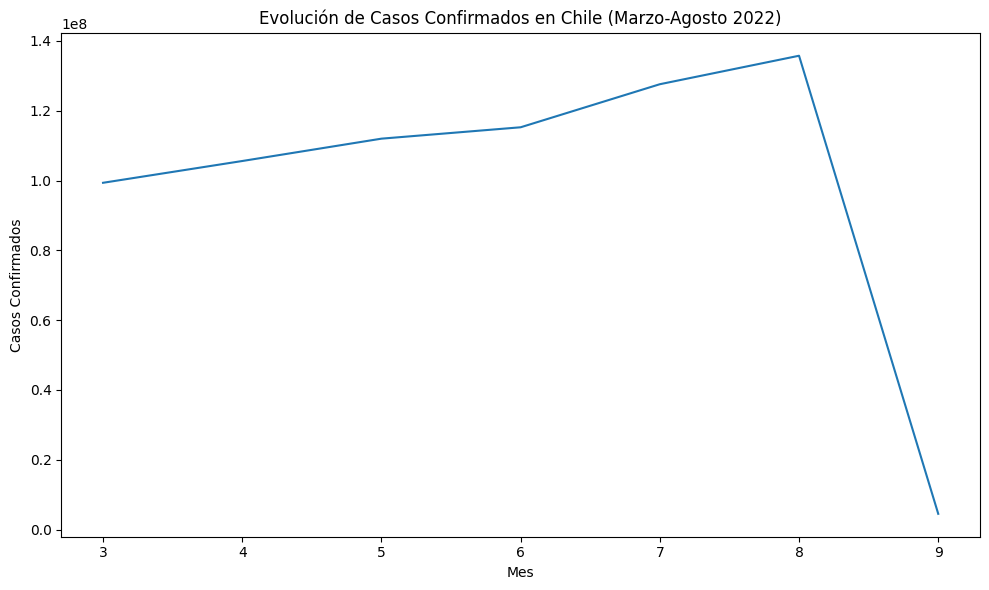

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

chile_df = combined_df[combined_df['Country_Region'] == 'Chile'].copy()
chile_df['Month'] = chile_df['Last_Update'].dt.month

chile_monthly_cases = chile_df.groupby('Month')['Confirmed'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=chile_monthly_cases, x='Month', y='Confirmed')
plt.title('Evolución de Casos Confirmados en Chile (Marzo-Agosto 2022)')
plt.xlabel('Mes')
plt.ylabel('Casos Confirmados')
plt.tight_layout()
plt.show()

### 6. ¿Cuál fue la fecha con más nuevos casos a nivel mundial durante este período?

In [8]:
combined_df['Last_Update'] = pd.to_datetime(combined_df['Last_Update'])
combined_df = combined_df.sort_values(by=['Country_Region', 'Last_Update'])
combined_df['New_Cases'] = combined_df.groupby('Country_Region')['Confirmed'].diff().fillna(0)
combined_df['Date'] = combined_df['Last_Update'].dt.date

casos_diarios_nuevos = combined_df.groupby('Date')['New_Cases'].sum().reset_index()

max_casos_diarios_nuevos = casos_diarios_nuevos.loc[casos_diarios_nuevos['New_Cases'].idxmax()]

max_casos_diarios_nuevos[['Date', 'New_Cases']]

Date         2022-03-02
New_Cases    28561163.0
Name: 10, dtype: object

### 7. ¿Existe correlación entre casos confirmados y fallecidos? (gráfico de dispersión + regresión).


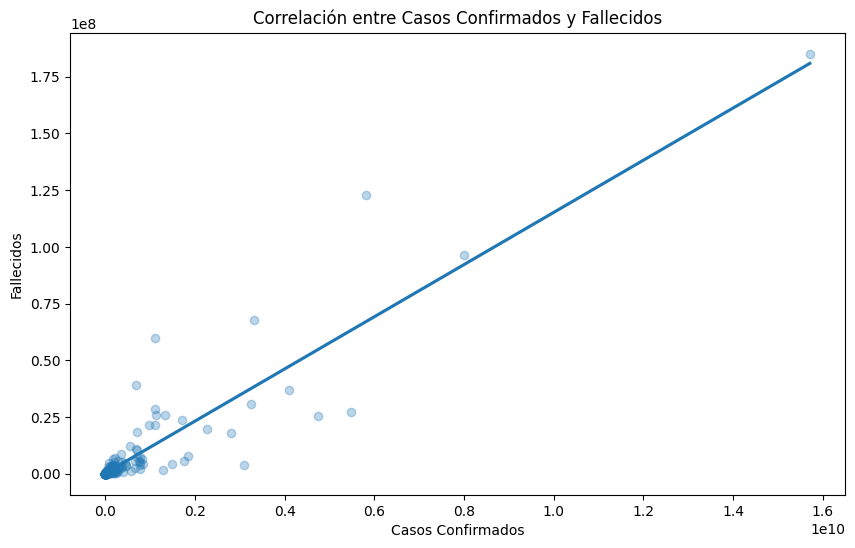


El coeficiente de correlación entre Casos Confirmados y Fallecidos es: 0.91


In [9]:
import matplotlib.pyplot as plt

correlation_df = combined_df.groupby('Country_Region')[['Confirmed', 'Deaths']].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.regplot(data=correlation_df, x='Confirmed', y='Deaths', scatter_kws={'alpha':0.3},ci=None)
plt.title('Correlación entre Casos Confirmados y Fallecidos')
plt.xlabel('Casos Confirmados')
plt.ylabel('Fallecidos')
plt.show()

# Calculate the correlation coefficient
correlation = correlation_df['Confirmed'].corr(correlation_df['Deaths'])
print(f"\nEl coeficiente de correlación entre Casos Confirmados y Fallecidos es: {correlation:.2f}")

### 8. Mostrar el Top 10 de países con mayor crecimiento porcentual de casos entre mayo y junio.

In [10]:
mayo = combined_df[(combined_df['Last_Update'].dt.month == 5) & (combined_df['Last_Update'].dt.year == 2022)]
junio = combined_df[(combined_df['Last_Update'].dt.month == 6) & (combined_df['Last_Update'].dt.year == 2022)]

casos_mayo = mayo.groupby('Country_Region')['Confirmed'].sum().reset_index()
casos_junio = junio.groupby('Country_Region')['Confirmed'].sum().reset_index()

crecimiento = pd.merge(casos_mayo, casos_junio, on = 'Country_Region', suffixes = ('_Mayo', '_Junio'))
crecimiento['Crecimiento_Porcentual'] = ((crecimiento['Confirmed_Junio'] - crecimiento['Confirmed_Mayo']) / crecimiento['Confirmed_Mayo']) * 100

crecimiento.sort_values('Crecimiento_Porcentual', ascending = False).round(2).head(10)

Country_Region  Confirmed_Mayo  Confirmed_Junio  Crecimiento_Porcentual
126            Nauru              93            14613                15612.90
185           Tuvalu              24               90                  275.00
175          Taiwan*        26940944         89485041                  232.15
118       Micronesia             374             1061                  183.69
93      Korea, North              17               30                   76.47
193          Vanuatu          257376           314723                   22.28
152            Samoa          358772           429098                   19.60
163  Solomon Islands          541557           638038                   17.82
129      New Zealand        32817135         37804371                   15.20
9          Australia       205956089        231383428                   12.35

### 9. Identificar países con rebrote (un día sin casos y luego un incremento posterior).

In [11]:
combined_df['Last_Update'] = pd.to_datetime(combined_df['Last_Update'])
combined_df = combined_df.sort_values(by=['Country_Region', 'Last_Update'])

combined_df['New_Cases'] = combined_df.groupby('Country_Region')['Confirmed'].diff().fillna(0)

rebrote_paises = set()

for country in combined_df['Country_Region'].unique():
    country_df = combined_df[combined_df['Country_Region'] == country].copy()
    country_df['New_Cases_Shift'] = country_df['New_Cases'].shift(-1).fillna(0)

    rebrote_dias = country_df[(country_df['New_Cases'] == 0) & (country_df['New_Cases_Shift'] > 0)]

    if not rebrote_dias.empty:
        rebrote_paises.add(country)

print("Países con posibles rebrotes:")
for pais in rebrote_paises:
    print(pais)

Países con posibles rebrotes:
Cameroon
Singapore
United Arab Emirates
Lithuania
Turkey
Korea, South
Brazil
Saudi Arabia
Bulgaria
Equatorial Guinea
Botswana
Philippines
Chad
Fiji
Bangladesh
Luxembourg
Portugal
Iran
South Sudan
Estonia
Uganda
Mexico
Burkina Faso
Kyrgyzstan
Dominica
South Africa
Netherlands
Bhutan
Saint Lucia
Iceland
Paraguay
Romania
Tanzania
Mozambique
Brunei
Timor-Leste
Kenya
Switzerland
Russia
Gabon
Israel
Uruguay
Panama
Canada
Malawi
Trinidad and Tobago
Ghana
Tonga
Namibia
Papua New Guinea
Madagascar
Argentina
Cote d'Ivoire
Thailand
Dominican Republic
Nauru
Jamaica
Montenegro
Marshall Islands
Ethiopia
Oman
China
Morocco
Greece
Colombia
Bahrain
Micronesia
Mali
San Marino
Niger
Kiribati
Sudan
Malta
Samoa
Iraq
North Macedonia
Ireland
Lebanon
Qatar
Czechia
Saint Vincent and the Grenadines
United Kingdom
Mauritius
Kazakhstan
Norway
Angola
Eswatini
Vietnam
Latvia
Senegal
Poland
Afghanistan
Guatemala
Korea, North
Benin
Tunisia
Ukraine
Saint Kitts and Nevis
Costa Rica
Sierra 

### 10. Generar un reporte de perfilado automático (ydata-profiling o pandas_profiling) que incluya distribuciones, correlaciones y resumen de calidad de datos.

In [12]:
!pip install ydata-profiling

from ydata_profiling import ProfileReport

profile = ProfileReport(combined_df, title="Profiling Report: COVID-19 Data (March-August 2022)")
profile.to_notebook_iframe()
profile.to_file("perfilado.html")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.9 MB/s eta 0:00:00


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:14<00:00,  1.08it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]